In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [3]:
data=pd.read_csv("Salary_Data.csv")
data.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [22]:
#outliers
z=np.abs(stats.zscore(data))
print(z)

[[1.58436141 1.4274946 ]
 [1.50839888 1.15816742]
 [1.24253001 1.26335495]
 [1.16656748 1.4059861 ]
 [0.90069861 0.74852479]
 [0.86271734 0.61083902]
 [0.78675481 0.83475501]
 [0.78675481 0.44226423]
 [0.59684848 0.72705554]
 [0.52088594 0.49042284]
 [0.48290468 0.781808  ]
 [0.48290468 0.73616133]
 [0.44492341 0.73129444]
 [0.29299834 0.57312065]
 [0.14107328 0.30516719]
 [0.06511074 0.38009368]
 [0.01085179 0.28945635]
 [0.23873939 0.22175169]
 [0.27672066 0.71538735]
 [0.58057079 0.62896088]
 [0.69451459 0.88545361]
 [0.99836472 1.00433907]
 [1.11230852 1.49534504]
 [1.30221486 1.32339483]
 [1.41615866 1.17232512]
 [1.60606499 1.61925438]
 [1.64404626 1.44914887]
 [1.98587766 1.81169261]]


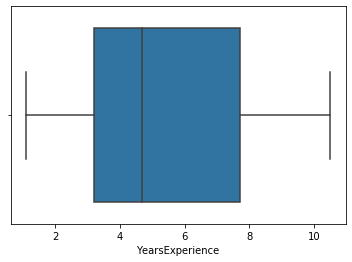

In [7]:
sns.boxplot(x=data['YearsExperience'])

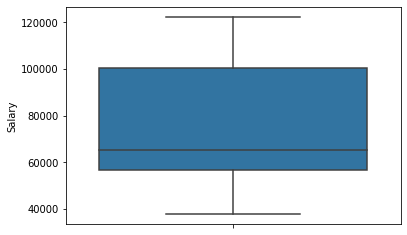

In [8]:
sns.boxplot(y=data['Salary'])

In [23]:
f_data=data[(z<3).all(axis=1)]
f_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
3,2.0,43525
4,2.2,39891
5,2.9,56642


In [24]:
df=data
for i in df:
    q=df[i].quantile(0.99)
    df[df[i]<q]
    q_low=df[i].quantile(0.01)
    q_high=df[i].quantile(0.99)
    df_filtered=df[(df[i]<q_high)&(df[i]>q_low)]
df_filtered.head()

,YearsExperience,Salary
1,1.3,46205
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150


In [13]:
data=df_filtered
print(len(data))
print(len(df_filtered))
if(len(data)==len(df_filtered)):
    print('No outliers')

28
28
No outliers


In [14]:
#NORMALIZATION
data_n=data.copy()
data_n=(data_n-data_n.min())/(data_n.max()-data_n.min())
data_n.head()

,YearsExperience,Salary
0,0.000000,0.000000
1,0.021277,0.083147
3,0.095745,0.050673
4,0.117021,0.006640
5,0.191489,0.209611


In [15]:
#TO TRAIN DATA
train_data,test_data=train_test_split(data_n,test_size=0.1)
print(len(train_data))
train_data.head()

25


,YearsExperience,Salary
19,0.521277,0.661549
12,0.308511,0.213428
13,0.319149,0.214931
1,0.021277,0.083147
21,0.638298,0.714052


In [16]:
x=np.array(train_data['YearsExperience'])
y=np.array(train_data['Salary'])

In [31]:
#TRAIN DATA
m=1
c=-1
lr=0.1  
d_m=1
d_c=1
err=[]
epochs=100  #epochs
def derive(m,c,x,y):
    m_d=-1*(y-m*x-c)*x
    c_d=-1*(y-m*x-c)
    return m_d,c_d
for i in range(epochs):
    er=0
    for j in range(len(x)):
        er+=((y[j]-(m*x[j])-c))**2
        pm=m
        pc=c
        d_m,d_c=derive(pm,pc,x[j],y[j])
        d_m=-lr*d_m
        d_c=-lr*d_c
        m=m+d_m  #Gradiant descent
        c=c+d_c  #Gradiant descent
        er=(1/(2*len(train_data['YearsExperience'])))*(er)
        err.append(er)
print("The local minimum occurs at m = %.2f"%(m),"c = %.2f"%(c))

The local minimum occurs at m = 1.07 c = -0.04


In [32]:
#ROOTMEANSQUAREERROR FOR TRAINING DATA
train_data_pred=m*train_data['YearsExperience']+c

In [33]:
yp=[]
for i in range(len(x)):
    p=(m*x[i])+c
    yp.append(p)
print("Predicted values (yp) : ",yp)

Predicted values (yp) :  [0.5197791318419377, 0.2923448014142271, 0.3037165179356126, -0.014691544663182225, 0.6448680135771785, 0.06491047098651648, 0.6107528640130219, 0.28097308489284156, 0.7358417457482628, 0.4174336831494679, 0.7699568953124193, 0.2582296518500705, 0.20137106924314285, 0.9291609266118167, 0.08765390402928755, 0.4401771161922389, 0.9177892100904312, 0.826815477919347, 1.0315063753042866, 0.17862763620037178, 0.2923448014142271, 0.5084074153205522, 0.16725591967898623, 0.3492033840211547, -0.03743497770595328]


In [34]:
sum=0
for i in range(len(x)):
  sum+=(y[i]-yp[i])**2
  mse=sum/len(x)
print("Mean Square Error (MSE) : ",mse)

Mean Square Error (MSE) :  0.005249664759913044


Text(0.5, 1.0, 'Predicted data vs Actual data')

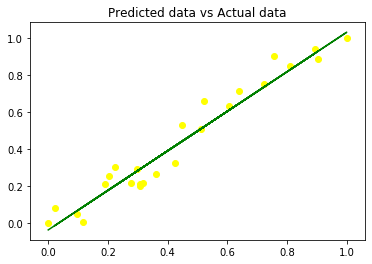

In [40]:
plt.plot(np.array(train_data['YearsExperience']),np.array(train_data_pred),'green')
plt.scatter(np.array(train_data['YearsExperience']),np.array(train_data['Salary']),color='yellow')
plt.title("Predicted data vs Actual data")

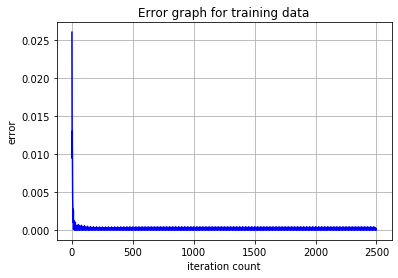

In [42]:
iters=np.arange(epochs*len(x))
plt.plot(iters,err,'blue')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

In [43]:
#TO TEST DATA
x1=np.array(test_data['YearsExperience'])
y1=np.array(test_data['Salary'])

In [44]:
test_data_pred=m*test_data['YearsExperience']+c
print(test_data_pred)

15    0.394690
7     0.201371
25    0.860931
Name: YearsExperience, dtype: float64


In [45]:
yp1=[]
for i in range(len(x1)):
    p1=(m*x1[i])+c
    yp1.append(p1)
print("Test data predicted values : ",yp1)

Test data predicted values :  [0.3946902501066969, 0.20137106924314285, 0.8609306274835037]


In [46]:
sum=0
for i in range(len(x1)):
    sum+=(y1[i]-yp1[i])**2
    mse1=sum/len(x1)
print("Mean Square Error (MSE) : ",mse1)

Mean Square Error (MSE) :  0.002020801234646171


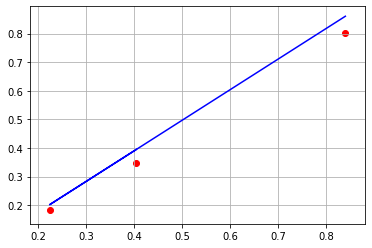

In [47]:
plt.scatter(test_data['YearsExperience'],test_data['Salary'],color='red')
plt.plot(test_data['YearsExperience'],test_data_pred,'blue')
plt.grid()